In [2]:
import os
import pandas as pd
import pathlib
import numpy as np

cwd = os.getcwd()
os.chdir("C:\\Users\\IlzeA\\Desktop\\DB2")

data = np.zeros((12000, 3993))

for i in range (1, 12001):
    
    df = pd.read_table("matrix_" + str(i) + ".dat", sep=",", header = None)
    df = df.to_numpy()
    data[i-1] = df.flatten()
    
print (data)

[[ 8.0954462  -0.20987126 -0.07504695 ...  9.7360336   0.07377332
   0.04958158]
 [ 8.0954462  -0.20987126 -0.07504695 ...  9.7360336   0.07377332
   0.04958158]
 [ 8.0954462  -0.20987126 -0.07504695 ...  9.7360336   0.07377332
   0.04958158]
 ...
 [ 8.0954462  -0.20987126 -0.07504695 ...  9.7360336   0.07377332
   0.04958158]
 [ 8.0954462  -0.20987126 -0.07504695 ...  9.7360336   0.07377332
   0.04958158]
 [ 8.0954462  -0.20987126 -0.07504695 ...  9.7360336   0.07377332
   0.04958158]]


In [5]:
cwd = os.getcwd()
os.chdir("C:\\Users\\IlzeA\\Desktop\\DB2")

labels = np.zeros((12000, 1))

for i in range (1, 12001):
    
    df = pd.read_table("label_" + str(i) + ".dat", sep=",", header = None)
    df = df.to_numpy()
    df = df[0]
    labels[i-1] = df.flatten()
    
print (labels)

FileNotFoundError: [Errno 2] File label_9609.dat does not exist: 'label_9609.dat'

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20)

In [6]:
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

import keras as keras
keras.backend.clear_session()

model = Sequential()

model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = 300))
model.add(Dropout(rate=0.1))

model.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(rate=0.1))

model.add(Dense(units = 1, activation = None))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 17,651
Trainable params: 17,651
Non-trainable params: 0
_________________________________________________________________


In [7]:
optim = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mean_squared_error'])

In [9]:
from keras.callbacks import History 
history = History()

from keras.callbacks import ModelCheckpoint  

epochs = 300

checkpointer = ModelCheckpoint(filepath='saved_models/weights_test_data_1.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=epochs, batch_size=20, callbacks=[checkpointer, history], verbose=1)


Train on 21 samples, validate on 6 samples
Epoch 1/300
21/21 [==============================] - 0s 236us/step - loss: 0.3618 - mean_squared_error: 0.3618 - val_loss: 0.3284 - val_mean_squared_error: 0.3284

Epoch 00001: val_loss improved from inf to 0.32839, saving model to saved_models/weights_test_data_1.hdf5
Epoch 2/300
21/21 [==============================] - 0s 237us/step - loss: 0.2902 - mean_squared_error: 0.2902 - val_loss: 0.4697 - val_mean_squared_error: 0.4697

Epoch 00002: val_loss did not improve from 0.32839
Epoch 3/300
21/21 [==============================] - 0s 238us/step - loss: 0.5030 - mean_squared_error: 0.5030 - val_loss: 0.6093 - val_mean_squared_error: 0.6093

Epoch 00003: val_loss did not improve from 0.32839
Epoch 4/300
21/21 [==============================] - 0s 190us/step - loss: 0.6689 - mean_squared_error: 0.6689 - val_loss: 0.5504 - val_mean_squared_error: 0.5504

Epoch 00004: val_loss did not improve from 0.32839
Epoch 5/300
21/21 [=======================


Epoch 00034: val_loss improved from 0.28364 to 0.28173, saving model to saved_models/weights_test_data_1.hdf5
Epoch 35/300
21/21 [==============================] - 0s 190us/step - loss: 0.1630 - mean_squared_error: 0.1630 - val_loss: 0.2804 - val_mean_squared_error: 0.2804

Epoch 00035: val_loss improved from 0.28173 to 0.28035, saving model to saved_models/weights_test_data_1.hdf5
Epoch 36/300
21/21 [==============================] - 0s 237us/step - loss: 0.1744 - mean_squared_error: 0.1744 - val_loss: 0.2785 - val_mean_squared_error: 0.2785

Epoch 00036: val_loss improved from 0.28035 to 0.27847, saving model to saved_models/weights_test_data_1.hdf5
Epoch 37/300
21/21 [==============================] - 0s 190us/step - loss: 0.1657 - mean_squared_error: 0.1657 - val_loss: 0.2761 - val_mean_squared_error: 0.2761

Epoch 00037: val_loss improved from 0.27847 to 0.27607, saving model to saved_models/weights_test_data_1.hdf5
Epoch 38/300
21/21 [==============================] - 0s 237us/s


Epoch 00067: val_loss improved from 0.23818 to 0.23714, saving model to saved_models/weights_test_data_1.hdf5
Epoch 68/300
21/21 [==============================] - 0s 332us/step - loss: 0.1626 - mean_squared_error: 0.1626 - val_loss: 0.2276 - val_mean_squared_error: 0.2276

Epoch 00068: val_loss improved from 0.23714 to 0.22756, saving model to saved_models/weights_test_data_1.hdf5
Epoch 69/300
21/21 [==============================] - 0s 190us/step - loss: 0.1410 - mean_squared_error: 0.1410 - val_loss: 0.2255 - val_mean_squared_error: 0.2255

Epoch 00069: val_loss improved from 0.22756 to 0.22550, saving model to saved_models/weights_test_data_1.hdf5
Epoch 70/300
21/21 [==============================] - 0s 237us/step - loss: 0.1362 - mean_squared_error: 0.1362 - val_loss: 0.2300 - val_mean_squared_error: 0.2300

Epoch 00070: val_loss did not improve from 0.22550
Epoch 71/300
21/21 [==============================] - 0s 190us/step - loss: 0.1201 - mean_squared_error: 0.1201 - val_loss:


Epoch 00100: val_loss did not improve from 0.18324
Epoch 101/300
21/21 [==============================] - 0s 142us/step - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.1861 - val_mean_squared_error: 0.1861

Epoch 00101: val_loss did not improve from 0.18324
Epoch 102/300
21/21 [==============================] - 0s 237us/step - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.1872 - val_mean_squared_error: 0.1872

Epoch 00102: val_loss did not improve from 0.18324
Epoch 103/300
21/21 [==============================] - 0s 142us/step - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.1864 - val_mean_squared_error: 0.1864

Epoch 00103: val_loss did not improve from 0.18324
Epoch 104/300
21/21 [==============================] - 0s 238us/step - loss: 0.1162 - mean_squared_error: 0.1162 - val_loss: 0.1826 - val_mean_squared_error: 0.1826

Epoch 00104: val_loss improved from 0.18324 to 0.18261, saving model to saved_models/weights_test_data_1.hdf5
Epoch 105/300
21/21 [

Epoch 132/300
21/21 [==============================] - 0s 285us/step - loss: 0.0657 - mean_squared_error: 0.0657 - val_loss: 0.1248 - val_mean_squared_error: 0.1248

Epoch 00132: val_loss improved from 0.12774 to 0.12484, saving model to saved_models/weights_test_data_1.hdf5
Epoch 133/300
21/21 [==============================] - 0s 190us/step - loss: 0.0668 - mean_squared_error: 0.0668 - val_loss: 0.1233 - val_mean_squared_error: 0.1233

Epoch 00133: val_loss improved from 0.12484 to 0.12335, saving model to saved_models/weights_test_data_1.hdf5
Epoch 134/300
21/21 [==============================] - 0s 237us/step - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.1226 - val_mean_squared_error: 0.1226

Epoch 00134: val_loss improved from 0.12335 to 0.12259, saving model to saved_models/weights_test_data_1.hdf5
Epoch 135/300
21/21 [==============================] - 0s 237us/step - loss: 0.0568 - mean_squared_error: 0.0568 - val_loss: 0.1232 - val_mean_squared_error: 0.1232

Epoch 


Epoch 00163: val_loss did not improve from 0.08744
Epoch 164/300
21/21 [==============================] - 0s 238us/step - loss: 0.0713 - mean_squared_error: 0.0713 - val_loss: 0.0925 - val_mean_squared_error: 0.0925

Epoch 00164: val_loss did not improve from 0.08744
Epoch 165/300
21/21 [==============================] - 0s 142us/step - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.0931 - val_mean_squared_error: 0.0931

Epoch 00165: val_loss did not improve from 0.08744
Epoch 166/300
21/21 [==============================] - 0s 190us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_loss: 0.0910 - val_mean_squared_error: 0.0910

Epoch 00166: val_loss did not improve from 0.08744
Epoch 167/300
21/21 [==============================] - 0s 142us/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0864 - val_mean_squared_error: 0.0864

Epoch 00167: val_loss improved from 0.08744 to 0.08643, saving model to saved_models/weights_test_data_1.hdf5
Epoch 168/300
21/21 [

21/21 [==============================] - 0s 190us/step - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0681 - val_mean_squared_error: 0.0681

Epoch 00195: val_loss did not improve from 0.06132
Epoch 196/300
21/21 [==============================] - 0s 142us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0868 - val_mean_squared_error: 0.0868

Epoch 00196: val_loss did not improve from 0.06132
Epoch 197/300
21/21 [==============================] - 0s 143us/step - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0858 - val_mean_squared_error: 0.0858

Epoch 00197: val_loss did not improve from 0.06132
Epoch 198/300
21/21 [==============================] - 0s 142us/step - loss: 0.0646 - mean_squared_error: 0.0646 - val_loss: 0.0693 - val_mean_squared_error: 0.0693

Epoch 00198: val_loss did not improve from 0.06132
Epoch 199/300
21/21 [==============================] - 0s 190us/step - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0615 - val_mean_squ


Epoch 00230: val_loss did not improve from 0.04731
Epoch 231/300
21/21 [==============================] - 0s 142us/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0501 - val_mean_squared_error: 0.0501

Epoch 00231: val_loss did not improve from 0.04731
Epoch 232/300
21/21 [==============================] - 0s 190us/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0609 - val_mean_squared_error: 0.0609

Epoch 00232: val_loss did not improve from 0.04731
Epoch 233/300
21/21 [==============================] - 0s 190us/step - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0688 - val_mean_squared_error: 0.0688

Epoch 00233: val_loss did not improve from 0.04731
Epoch 234/300
21/21 [==============================] - 0s 142us/step - loss: 0.0506 - mean_squared_error: 0.0506 - val_loss: 0.0701 - val_mean_squared_error: 0.0701

Epoch 00234: val_loss did not improve from 0.04731
Epoch 235/300
21/21 [==============================] - 0s 142us/step - loss: 0.0

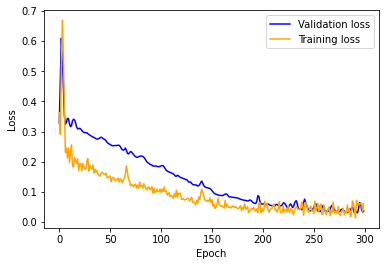

In [11]:
import matplotlib.pyplot as plt 

fig = plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['val_loss'], color = 'blue', label = "Validation loss")
plt.plot(history.history['loss'], color = 'orange', label = "Training loss")
plt.legend()


In [12]:
print("Evaluate test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate test data
3/3 [==============================] - 0s 0us/step
test loss, test acc: [0.040081556886434555, 0.040081556886434555]


In [13]:
print("Predictions for test data")
predictions = model.predict(X_test)
print(predictions)

print("Test data")
print(y_test)


Predictions for test data
[[ 0.24337012]
 [-0.15033299]
 [ 0.596983  ]]
Test data
[[0.2398]
 [0.05  ]
 [0.88  ]]
